**Visualitzation of the original data: images, boxes and masks**

In [1]:
from src.preprocess import load_data
import os

# Paths to images, bounding boxes, and masks
image_path = "data/images"
bbox_path = "data/kavsir_bboxes.json"
masks_path = "data/masks"

# Load bounding box annotations and masks
bounding_boxes = load_data(bbox_path)
masks = load_data(masks_path, is_mask=True)

# Get a list of image filenames
image_filenames = os.listdir(image_path)

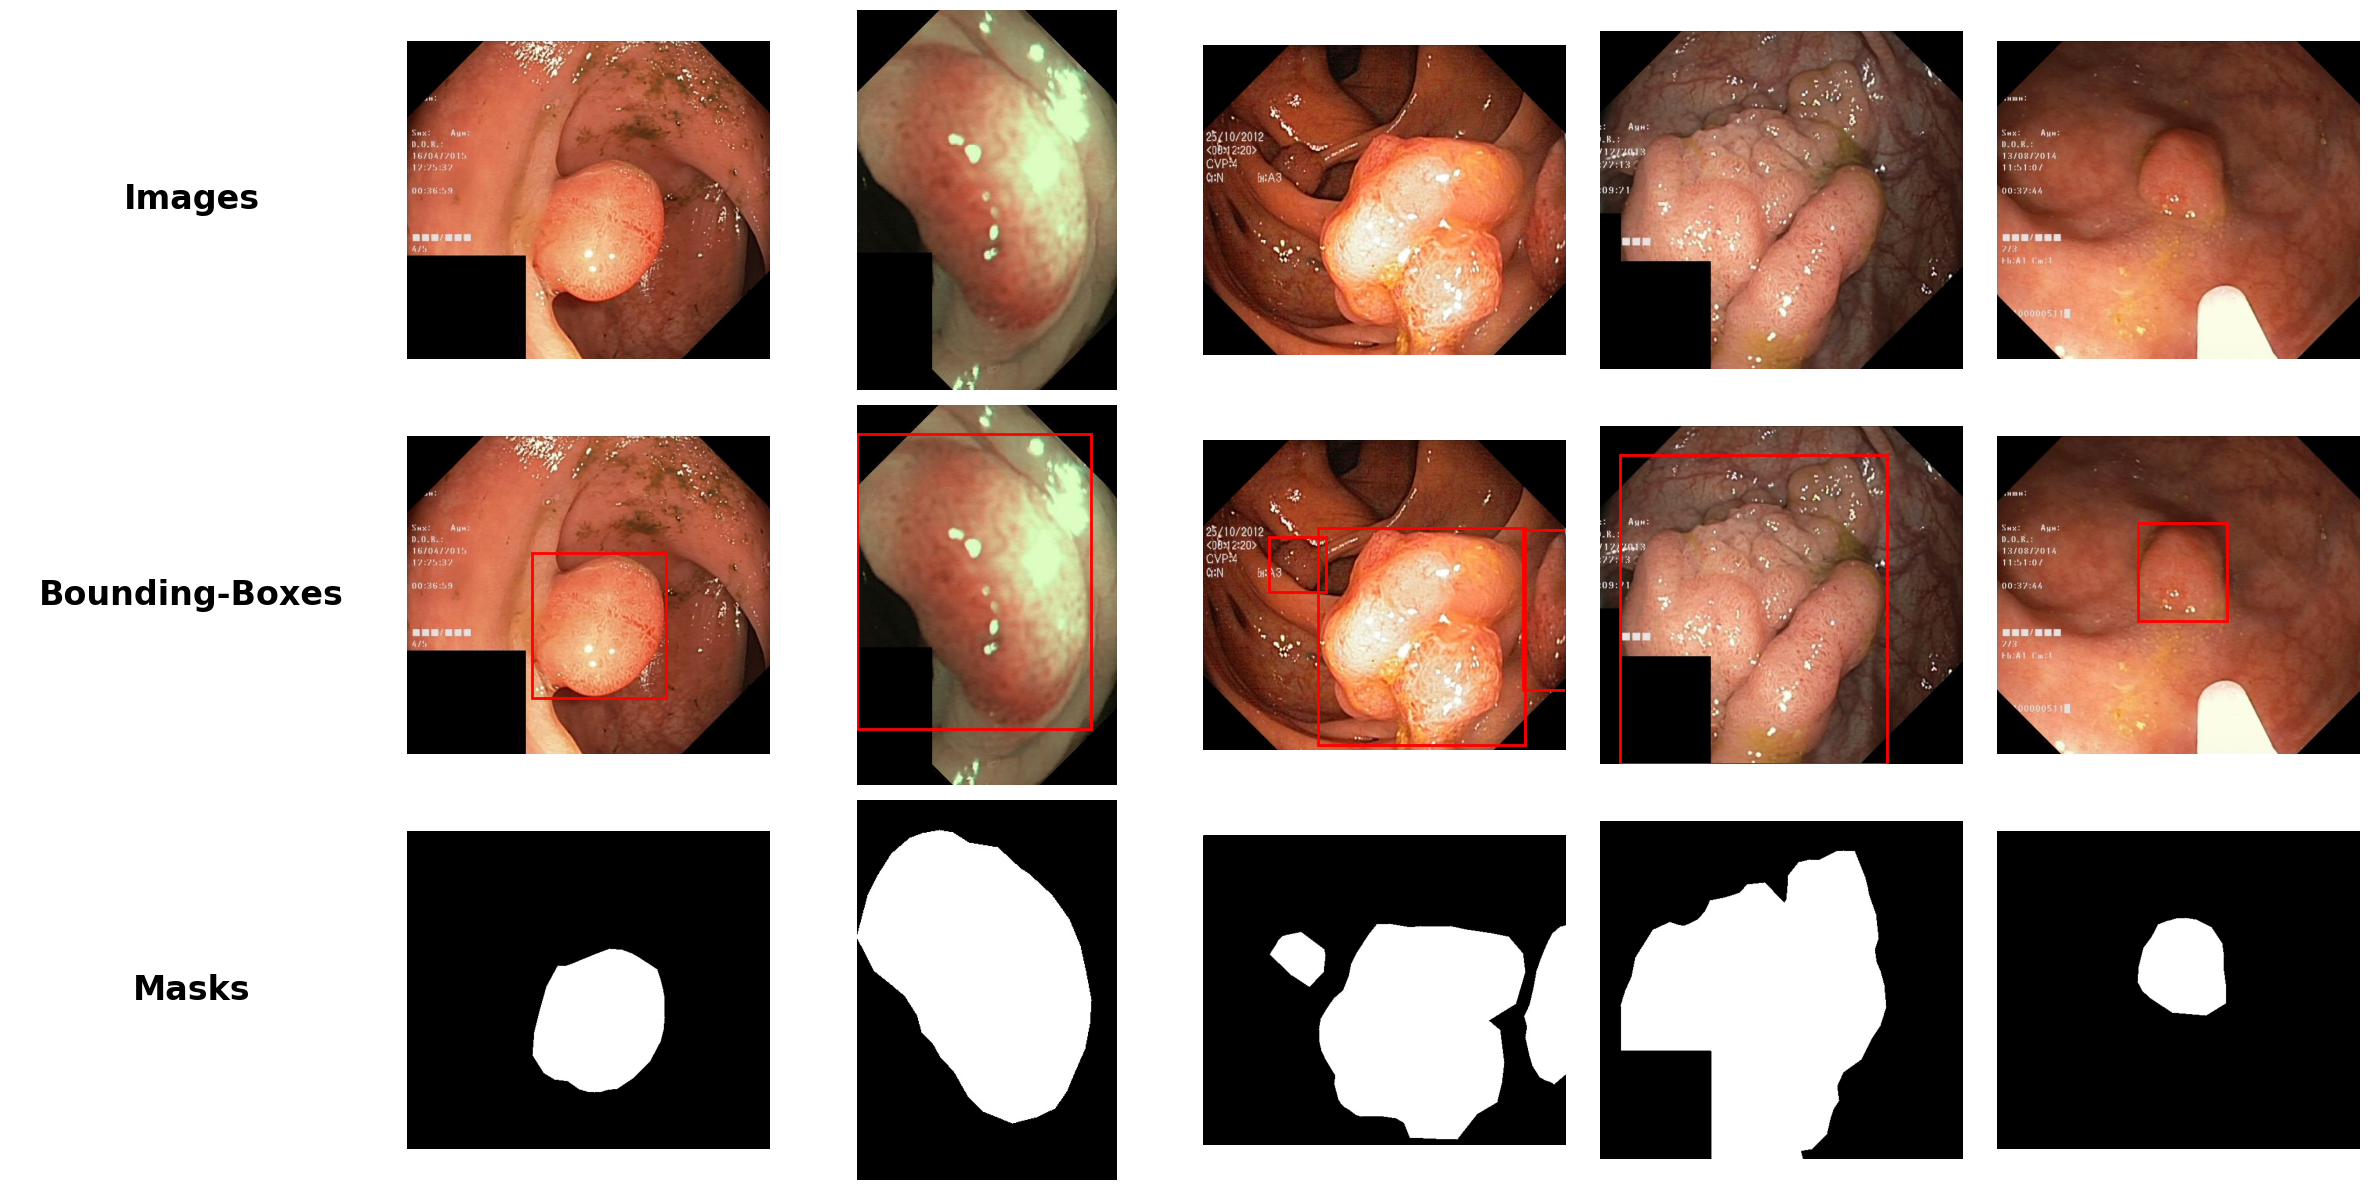

In [5]:
from PIL import Image
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import random


# Select 5 random images
random_images = random.sample(image_filenames, 5)

# Create a subplot with a grid view to display images, annotations, and masks
fig, axes = plt.subplots(3, 6, figsize=(24, 12))

# Define row names
row_names = ['Images', 'Bounding-Boxes', 'Masks']

# Plot row names
for i, name in enumerate(row_names):
    axes[i, 0].text(0.5, 0.5, name, ha='center', va='center', fontsize=24, weight='bold')
    axes[i, 0].axis('off')

# Plot the 5 random images with their corresponding bounding boxes and masks
for i, image_filename in enumerate(random_images):
    # Load the image
    image = Image.open(os.path.join(image_path, image_filename))

    # Display the image
    axes[0, i+1].imshow(image)
    axes[0, i+1].axis('off')

    # Extract bounding box annotations
    bbox_info = bounding_boxes.get(image_filename[:-4])  # Remove extension (.jpg) from image filename

    if bbox_info:
        # Process bounding box annotations
        for bbox in bbox_info['bbox']:
            xmin = bbox['xmin']
            ymin = bbox['ymin']
            xmax = bbox['xmax']
            ymax = bbox['ymax']

            # Create a rectangle patch
            rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')

            # Add the rectangle patch to the Axes
            axes[1, i+1].add_patch(rect)

    # Display the annotated image
    axes[1, i+1].imshow(image)
    axes[1, i+1].axis('off')

    # Load and display mask
    mask = masks.get(image_filename[:-4])
    if mask is not None:
        axes[2, i+1].imshow(mask, cmap='gray')
        axes[2, i+1].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()